## **Пару слов про функции потерь**

Функции потерь можно разделить на выпуклые и невыпуклые. Первый вариант чаще всего встречается в классическом машинном обучении из-за относительной простоты моделей, а также из-за того, что у выпуклых функций локальный минимум по определению является и глобальным (но не обязательно единственным). Невыпуклые функции, в свою очередь, чаще всего встречаются в нейронных сетях из-за их высокой сложности и в данном случае поиск глобального минимума является трудной задачей, поэтому на практике здесь также используются методы из случая с выпуклыми функциями из-за их способности хорошо аппроксимировать стационарные точки в невыпуклом случае. Проще говоря, методы для выпуклого случая могут хорошо сходиться в локальном оптимуме для невыпуклого случая за приемлемое время, значение которого близко к глобальному.

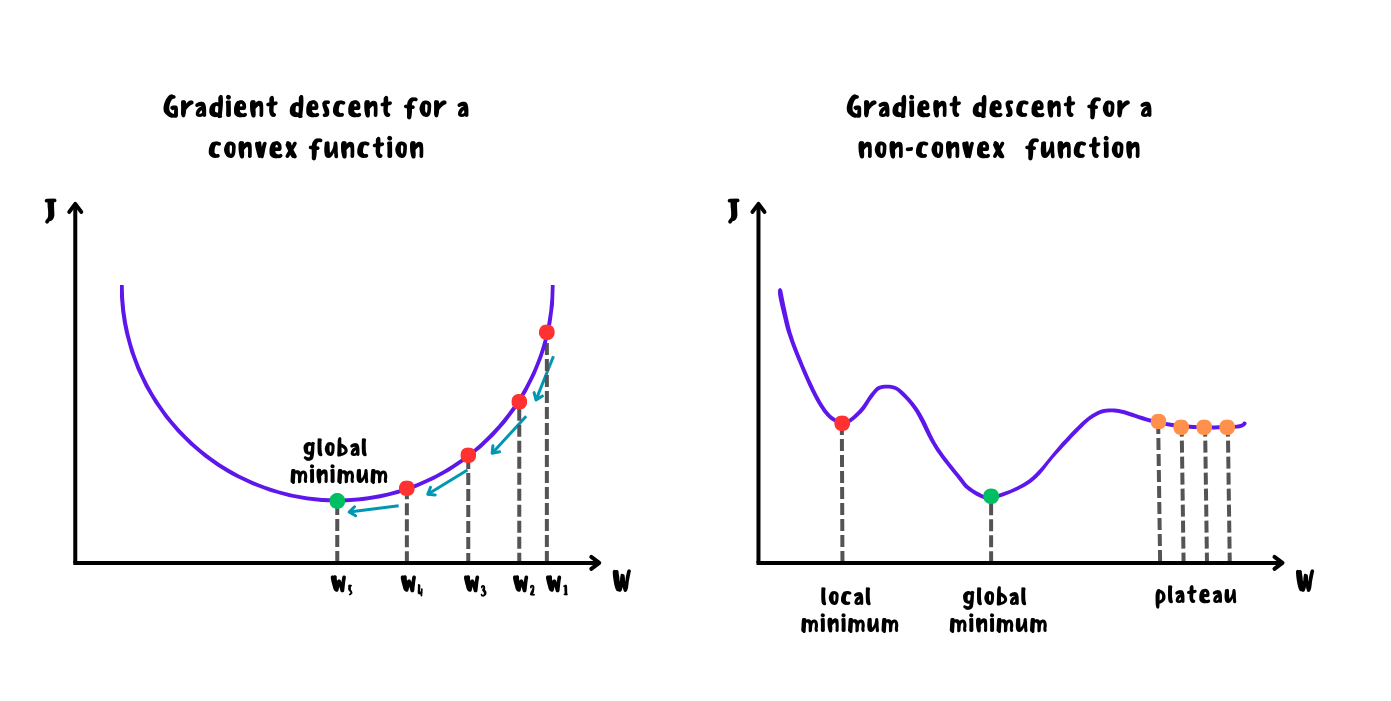

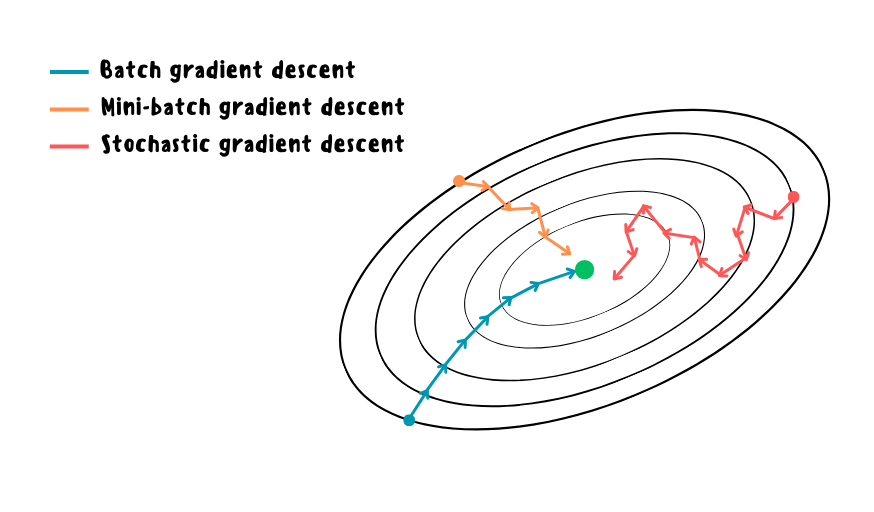

### **Momentum**
Предположим, что со склона с кочками катится мяч, который сначала будет двигаться медленно, но по мере накопления кинетической энергии его скорость будет расти, что ему поможет преодолеть небольшие кочки и остановить своё движение в более глубокой. Именно данный принцип лежит в основе моментной оптимизации. Momentum принимает во внимание значения предыдущих градиентов, которые используются для определения направления и скорости перемещения в пространстве параметров $v_t$ (называется вектором первого момента, поскольку масса в данном случае равна 1), а для предотвращения её быстрого увеличения используется коэффициент ослабления импульса $\beta$, который отвечает за силу влияния предыдущего градиента на текущий, то есть выступает в качестве механизма трения мяча о поверхность: значение 0 означает высокое трение, а 1 его отсутствие. Обычно значение $\beta$ устанавливается 0.9.

**Алгоритм обновления параметров моментной оптимизации**

$v_t \leftarrow \beta v_{t-1} - \alpha dw_{t-1}$

$w_t \leftarrow w_{t-1} + v_t$

Momentum способен решить сразу две проблемы: плохую обусловленность матрицы Гессе и дисперсию стохастического градиента. С другой стороны, из-за вычисления градиента функции потерь в локальной позиции модель может колебаться вокруг локальных минимумов, что в свою очередь увеличивает время схождения.

Хотя во многих статьях $v_t$ обозначается как $m_t$, а $s_t$ как $v_t$, на данный момент нет единого стандарта и в разных статьях можно встретить для них разные обозначения, но для унификации во всех примерах будут использоваться следующие обозначения: $v_t$ — это первый момент или ещё по-другому экспоненциально взвешенное скользящее среднее градиентов, а $s_t$ — второй момент или экспоненциально взвешенное скользящее среднее квадратов градиентов, однако в случае AdaGrad это просто квадрат градиентов.

### **Nesterov momentum**
Для решения вышеописанной проблемы применяется небольшая оптимизация, суть которой заключается в вычислении градиентов не в локальной позиции, а чуть дальше в направлении момента. Другими словами, функция потерь будет снижаться не в текущей позиции, а в которой якобы должна оказаться в будущем, следуя направлению импульса.

**Алгоритм обновления параметров моментной оптимизации Нестерова**

$v_t \leftarrow \beta v_{t-1} - \alpha d(w_{t-1} + \beta v_{t-1} )$

$w_t \leftarrow w_{t-1} + v_t$


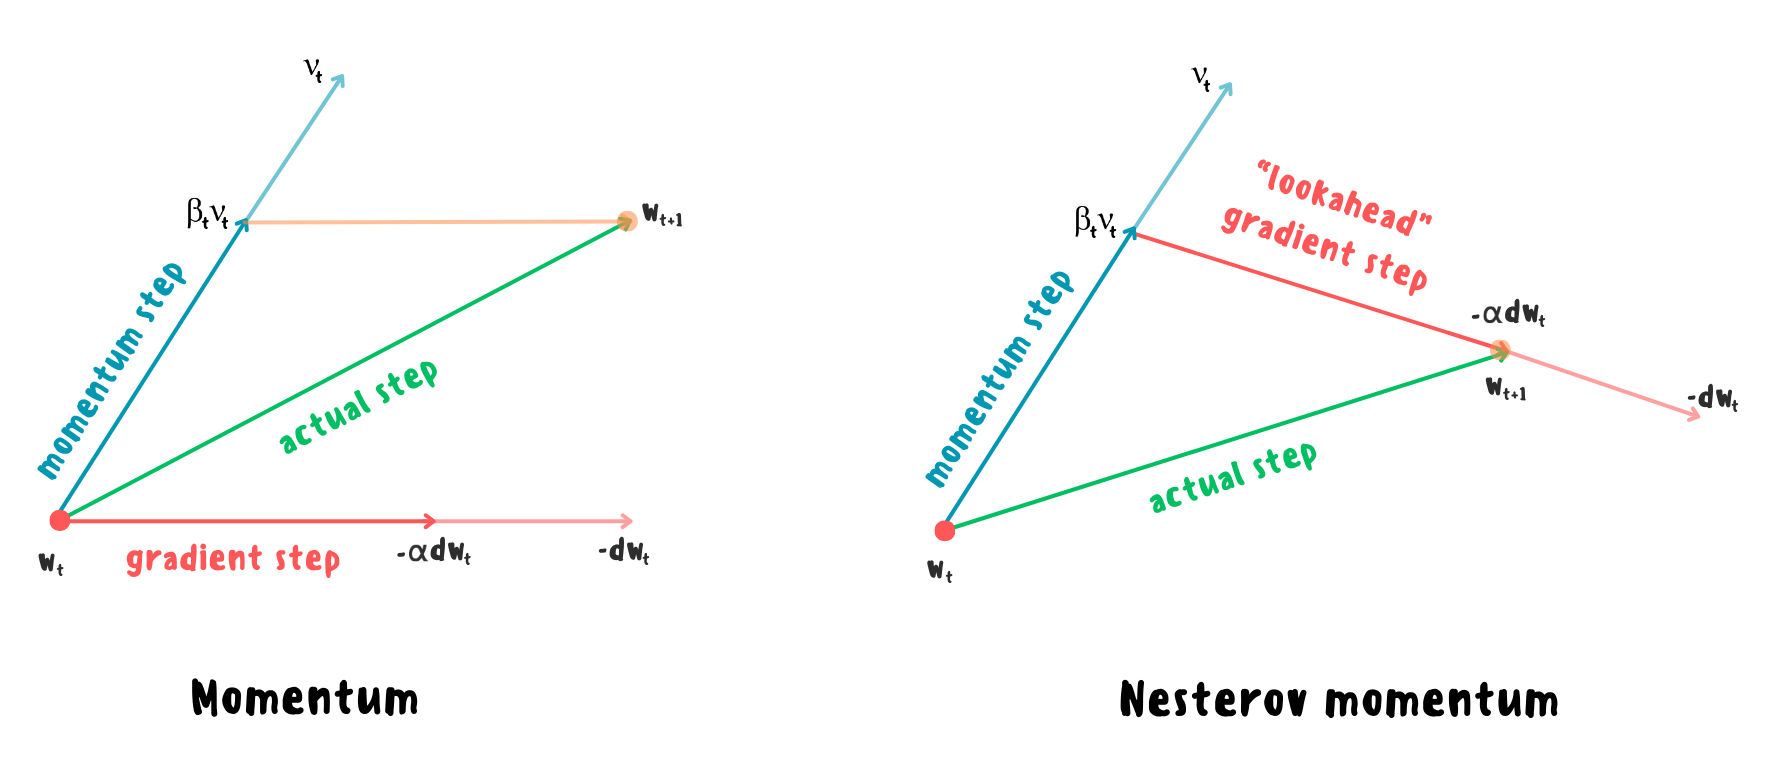

Такой подход позволяет сойтись гораздо быстрее и чуть ближе к оптимуму, однако он всё ещё может быть чувствительным в отношении одних направлений пространства параметров и нечувствительным в других из-за трудностей подбора оптимальной скорости обучения. Ниже будут представлены оптимизации градиентного спуска с адаптивной скоростью обучения.

### **AdaGrad**
Adaptive Gradient является одной из первых оптимизаций градиентного спуска с адаптивным шагом, в которой снижается градиент вдоль самых крутых направлений. Проще говоря, на каждом шаге происходит обновление параметров модели с учётом значений как предыдущих градиентов, так и их квадратов.

**Алгоритм обновления параметров AdaGrad**

$s_t \leftarrow s_{t-1} + dw_{t-1}^2$

$w_t \leftarrow w_{t-1} - \frac{\alpha}{\sqrt{s_t + \epsilon}} dw_{t-1}$

$\epsilon = 1e-8 \ - \ $ smoothing parameter to avoid division by zero

Такой простой подход позволяет алгоритму быстро начать обучение, а затем замедлить его, когда градиент становится меньше или меняет знак. Однако на практике AdaGrad хорошо справляется с выпуклыми случаями, а вот при обучении нейронных сетей нередко останавливается слишком рано из-за быстрого снижения скорости обучения, так и не достигнув глобального оптимума.

### **RMSProp**
RMSProp (Root Mean Square Propagation) — модификация AdaGrad, адаптированная для лучшей работы в невыпуклом случае. Основная идея заключается в изменении способа агрегирования градиента на экспоненциально взвешенное скользящее среднее. Другими словами, вместо накопления всех квадратов градиента с начала обучения, накапливаются квадраты градиента только из самых последних итераций.

**Алгоритм обновления параметров RMSProp**

$s_t \leftarrow \beta s_{t-1} + (1 - \beta) dw_{t-1}^2$

$w_t \leftarrow w_{t-1} - \frac{\alpha}{\sqrt s_t + \epsilon} dw_{t-1}$

В целом, RMSProp является крайне эффективной оптимизацией, но не самой лучшей. Например, могут возникнуть трудности обучения в многомерных пространствах из-за проблем с масштабированием градиентов в разных направлениях.

### **Adam и его модификации**
Adam (Adaptive Moment Estimation) объединяет в себе концепции Momentum и RMSProp, практически являясь серебряной пулей в задачах стохастической оптимизации. Как можно заметить, расчёт моментов в Adam очень схож с Momentum и RMSProp за исключением того, что к ним применяется поправка на смещение. В целом, благодаря таким улучшениям Adam сходится быстрее и лучше предшественников, а также более устойчив к подбору гиперпараметров, что делает его более стабильным решением в большинстве случаев.

**Алгоритм обновления параметров Adam**

$v_t \leftarrow \beta_1 v_{t-1} + (1 - \beta_1) dw_{t-1}$

$s_t \leftarrow \beta_2 s_{t-1} + (1 - \beta_2) dw_{t-1}^2$

$w_t \leftarrow w_{t-1}  - \alpha \frac{v_t}{\sqrt s_t + \epsilon}$

$v_t \leftarrow \frac{v_t}{1 - \beta_1^t}\ - \ $ bias correction

$s_t \leftarrow \frac{s_t}{1 - \beta_2^t}\ - \ $ bias correction

$\beta_1 = 0.9, \ \ \beta_2 = 0.99 \ \ $ by default

С другой стороны, данный алгоритм более сложен в анализе и может быть чувствителен к шуму, что может привести к проблемам со сходимостью, а также он требует больших объемов памяти, поскольку хранит не только параметры модели, но а также информацию о градиентах и накопленном импульсе. Помимо этого, у Adam и всех предыдущих алгоритмов есть ещё один неприятный недостаток: если продолжить обучение модели после прерывания в некоторой точке, придётся восстанавливать не только веса модели из данной точки, но а также и всю информацию о накопленных параметрах.

Однако время не стоит на месте и были разработаны модификации Adam, призванные устранить в той или иной степени недостатки, описанные выше. К наиболее популярным и интересным модификациям можно отнести следующие:

- **AdaMax** использует экспоненциально взвешенную норму бесконечности для обновления вектора второго момента, то есть скорость обучения изменяется, основываясь максимальной величине градиента в истории:

$$s_t \leftarrow max(\beta_2 s_{t-1} |dw_{t-1}|)$$

- **Nadam** (Nesterov-accelerated Adaptive Moment Estimation) использует другую поправку на смещение для вектора первого момента:

$$\hat v_t \leftarrow \frac{(1 - \beta_1^t) dw_{t-1}}{1 - \Pi_{i=1}^{t} \beta_1^i} + \frac{\beta_1^{t+1} v_t}{1 - \Pi_{i=1}^{t+1} \beta_1^i}$$

- **AdamW** добавляет L2-регуляризацию к функции потерь и при обновлении весов:

$$w_t \leftarrow w_{t-1}  - \frac{\alpha v_t}{\sqrt s_t + \epsilon} + \lambda w_{t-1}$$

- **Yogi** обновляет вектор второго момента с учётом разности второго момента и квадрата градиента:

$$s_t \leftarrow  s_{t-1} - (1 - \beta_2) sign(s_{t-1} - dw_{t-1}^2) dw_{t-1}^2$$

- **Adan** (Adaptive Nesterov Momentum) использует модифицированный New Nesterov Momentum (NME позволяет избежать дополнительных затрат на вычисление градиента в точке экстраполяции) для оценки первого и второго моментов, что позволяет значительно ускорить сходимость и найти приближённую точку первого порядка с заданной точностью $\epsilon$. Схема работы алгоритма выглядит следующим образом:


## Данные

[Boston Housing](https://www.kaggle.com/datasets/arunjangir245/boston-housing-dataset). 

**Загрузка и подготовка датасета**

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from torch import nn, optim, FloatTensor, relu, manual_seed

from keras import optimizers
from keras.layers import Dense
from keras.models import Sequential
from keras.utils import set_random_seed

In [ ]:
boston = pd.read_csv("BostonHousing.csv")

In [26]:
print(boston.iloc[:, :-1].values)

[[6.3200e-03 1.8000e+01 2.3100e+00 ... 1.5300e+01 3.9690e+02 4.9800e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9690e+02 9.1400e+00]
 [2.7290e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9283e+02 4.0300e+00]
 ...
 [6.0760e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 5.6400e+00]
 [1.0959e-01 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9345e+02 6.4800e+00]
 [4.7410e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 7.8800e+00]]


In [ ]:
boston.dropna(inplace=True)

X, y = boston.iloc[:, :-1].values, boston.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

X_train_s = StandardScaler().fit_transform(X_train)
X_test_s = StandardScaler().fit_transform(X_test)

**Параметры нейросети**

In [15]:
nn_params = {'in_features': X.shape[1], 'h1': 16, 'h2': 8, 'out': 1}

**Сравнение оптимизаторов Pytorch на тренировочных данных**

In [39]:
class TorchNN(nn.Module):
    def __init__(self, in_features, h1, h2, out):
        super(TorchNN, self).__init__()
        self.fc1 = nn.Linear(in_features, h1)
        self.fc2 = nn.Linear(h1, h2)
        self.fc3 = nn.Linear(h2, out)

    def forward(self, x):
        x = relu(self.fc1(x))
        x = relu(self.fc2(x))
        x = self.fc3(x)

        return x


def torch_losses(data, model, optim_cls, optim_params, num_epochs=100):
    losses = []
    X_train, y_train = data
    criterion = nn.MSELoss()
    optimizer = optim_cls(model.parameters(), **optim_params)

    for epoch in range(num_epochs):
        y_pred = model.forward(X_train)
        loss = criterion(y_pred, y_train)
        losses.append(loss.item())

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    return losses



In [43]:
manual_seed(0)
X_train_s_tensor = FloatTensor(X_train_s)
y_train_tensor = FloatTensor(y_train).view(-1, 1)

X_test_s_tensor = FloatTensor(X_test_s)
y_test_tensor = FloatTensor(y_test).view(-1, 1)

In [60]:
torch_optimizers = [
    
    (optim.SGD, 'SGD', {'lr': 0.001}),
    (optim.SGD, 'Momentum', {'lr': 0.001, 'momentum': 0.9}),
    (optim.SGD, 'Nesterov Momentum', {'lr': 0.001, 'momentum': 0.9, 'nesterov': True}),
    (optim.Adagrad, 'Adagrad', {'lr': 0.01, }),
    (optim.RMSprop, 'RMSprop', {'lr': 0.01}),
    (optim.Adam, 'Adam', {'lr': 0.01}),
    (optim.Adamax, 'Adamax', {'lr': 0.01}),
    (optim.AdamW, 'AdamW', {'lr': 0.01}),
    (optim.NAdam, 'NAdam', {'lr': 0.01})
    ]


def plot_results(torch_optimizers, nn_params, X_train_s_tensor, y_train_tensor):
    plt.figure(figsize=(14, 6))
    
    for optim_cls, optim_name, optim_params in torch_optimizers:
        nn_model = TorchNN(**nn_params)
        t_losses = torch_losses((X_train_s_tensor, y_train_tensor), nn_model, optim_cls, optim_params)
        plt.plot(range(len(t_losses)), t_losses, label=f'{optim_name}')

    plt.title('Pytorch optimizers comparison on train data')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
    

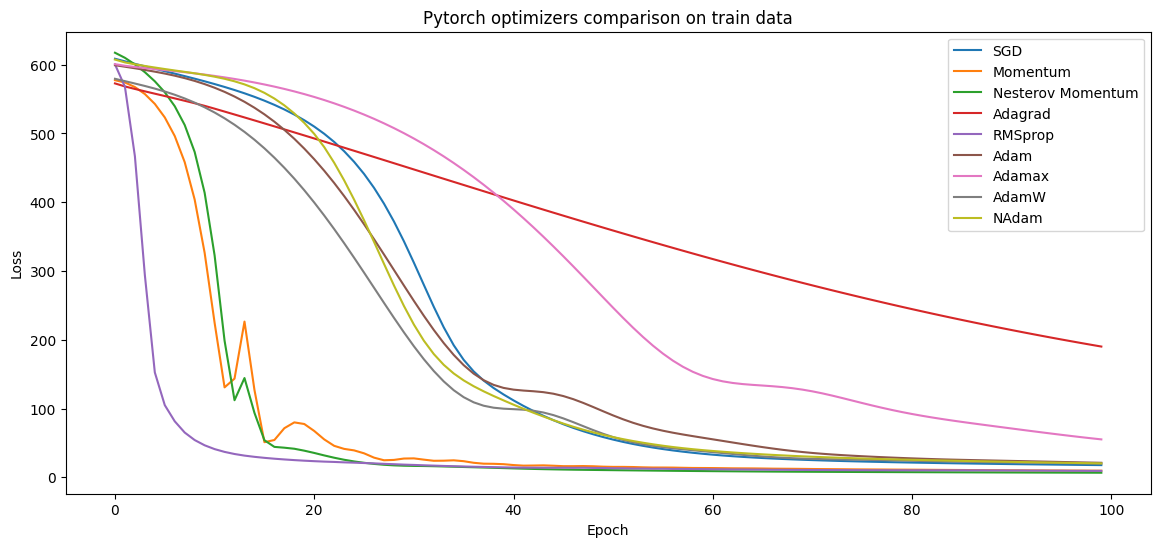

In [61]:
plot_results(torch_optimizers, nn_params, X_test_s_tensor, y_test_tensor)

**Сравнение оптимизаторов Keras на тестовых данных**

/Users/astemir/Desktop/Optimization/Optimization-ML/.venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


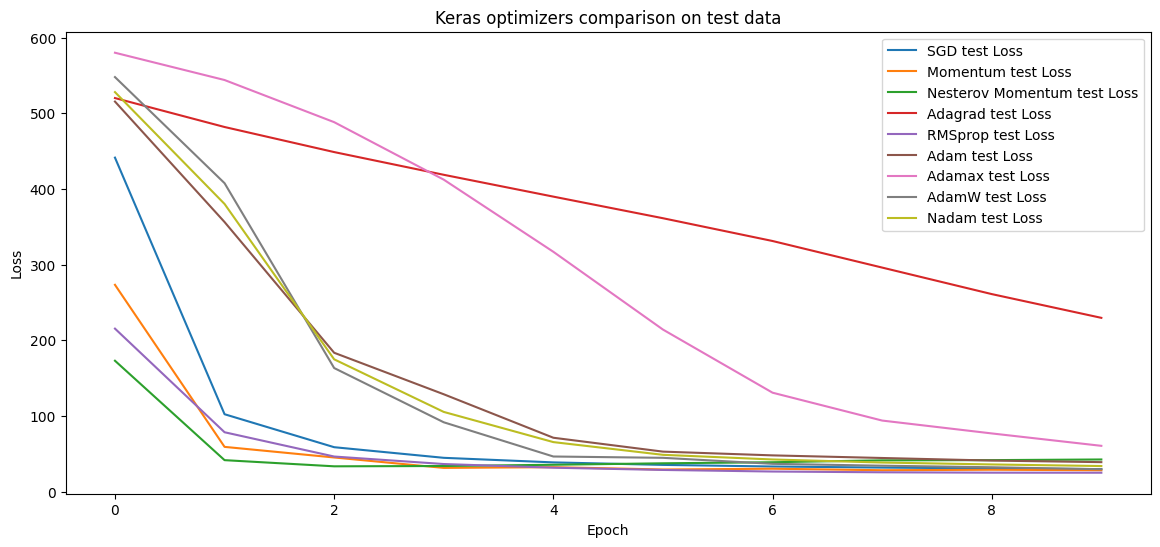

In [62]:
def create_keras_nn(optimizer, in_features, h1, h2, out):
    model = Sequential()
    model.add(Dense(input_shape=(in_features,), units=h1, activation='relu'))
    model.add(Dense(input_shape=(h1,), units=h2, activation='relu'))
    model.add(Dense(units=out))
    model.compile(optimizer=optimizer, loss='mse', metrics=['mse'])

    return model


def keras_losses(train_data, test_data, optimizers, nn_params, num_epochs=10):
    losses = []
    X_train, y_train = train_data
    X_test, y_test = test_data

    for name, optimizer in optimizers:
        model = create_keras_nn(optimizer, **nn_params)
        model_history = model.fit(X_train, y_train, batch_size=32, epochs=num_epochs,
                                  verbose=0, validation_data=(X_test, y_test))
        losses.append((name, model_history.history['val_loss']))

    return losses


set_random_seed(0)

keras_optimizers = [
    ('SGD', optimizers.SGD(learning_rate=0.001)),
    ('Momentum', optimizers.SGD(learning_rate=0.001, momentum=0.9)),
    ('Nesterov Momentum', optimizers.SGD(learning_rate=0.001, momentum=0.9, nesterov=True)),
    ('Adagrad', optimizers.Adagrad(learning_rate=0.01)),
    ('RMSprop', optimizers.RMSprop(learning_rate=0.01)),
    ('Adam', optimizers.Adam(learning_rate=0.01)),
    ('Adamax', optimizers.Adamax(learning_rate=0.01)),
    ('AdamW', optimizers.AdamW(learning_rate=0.01)),
    ('Nadam', optimizers.Nadam(learning_rate=0.01))
    ]


plt.figure(figsize=(14, 6))

k_losses = keras_losses((X_train_s, y_train), (X_test_s, y_test), keras_optimizers, nn_params)

for name, k_loss in k_losses:
    plt.plot(k_loss, label=name + ' test Loss')

plt.title('Keras optimizers comparison on test data')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Выводы

Поскольку SDG, Momentum и Nesterov momentum являются менее стабильными алгоритмами и больше всего зависят от начальных значений learning rate, для них была задана меньшая скорость обучения, чем для остальных методов. На первом графике видно, что даже в таком случае эти алгоритмы немного подвержены колебаниям, хотя и быстро сошлись. Второй же график хорошо демонстрирует как обучение на мини-пакетах значительно ускоряет сходимость алгоритмов. В случае с AdaGrad возникла классическая проблема резкого снижения скорости обучения, которую в данном случае можно легко решить, установив изначально более высокое значение. А вот RMSprop хорошо сработал в обоих случаях и даже лучше Adam-подобных оптимизаторов.

Отсюда следует интересный вывод, что адаптивные методы могут сходиться быстрее предшественников далеко не в каждой ситуации, но зато они гораздо стабильнее минимизируют функцию потерь. Конкретно в данном случае это означает, что если мы установим одинаковые произвольные значения learning rate для всех оптимизаторов, то неадаптивные методы зачастую будут снижаться с очень большими рывками и могут не сойтись вообще, в то время как адаптивные методы будут более плавно сходиться, хоть и медленно.

Стоит добавить, что данный пример лишь в очередной раз доказывает, что нет универсального оптимизатора, который являлся бы лучшим выбором для всех задач машинного обучения, поскольку многое зависит от самых разных факторов, включая природу данных, сложность модели и цели обучения. Однако это не отменяет тот факт, что в случае со сложными ландшафтами потерь адаптивные методы практически всегда будут превосходить простые стохастические оптимизаторы не только в плане стабильности, но и конечно же в скорости. Поэтому в большинстве ситуаций RMSprop и особенно семейство оптимизаторов Adam можно рассматривать в качестве хорошего стартового решения.

